In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import tensorflow as tf
import gc
gc.enable()

In [5]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load data from CSV files into DataFrames
user_a = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv')
user_b = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_b.csv')
user_c = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_c.csv')

# Step 3: Combine the DataFrames into one
train_data = pd.concat([user_a, user_b, user_c], axis=0, ignore_index=True)

# Step 4: Display the combined DataFrame shape
print(f"Combined training data shape: {train_data.shape}")

# Step 5: Optionally save the combined DataFrame to a CSV file
train_data.to_csv("train_data.csv", index=False)


Combined training data shape: (51655, 26)


In [6]:
# Randomizing order of training data because to ensure no bias during training
# Step 1: Randomize the order of rows in the DataFrame
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Display the shape of the shuffled DataFrame (optional)
print(f"Shuffled training data shape: {train_data.shape}")

# Step 3: Save the randomized DataFrame to a new CSV file (optional)
train_data.to_csv("shuffled_train_data.csv", index=False)


Shuffled training data shape: (51655, 26)


In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 19.4 MB/s eta 0:00:00m eta 0:00:010:00:01


/opt/anaconda3/envs/brain_bci_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


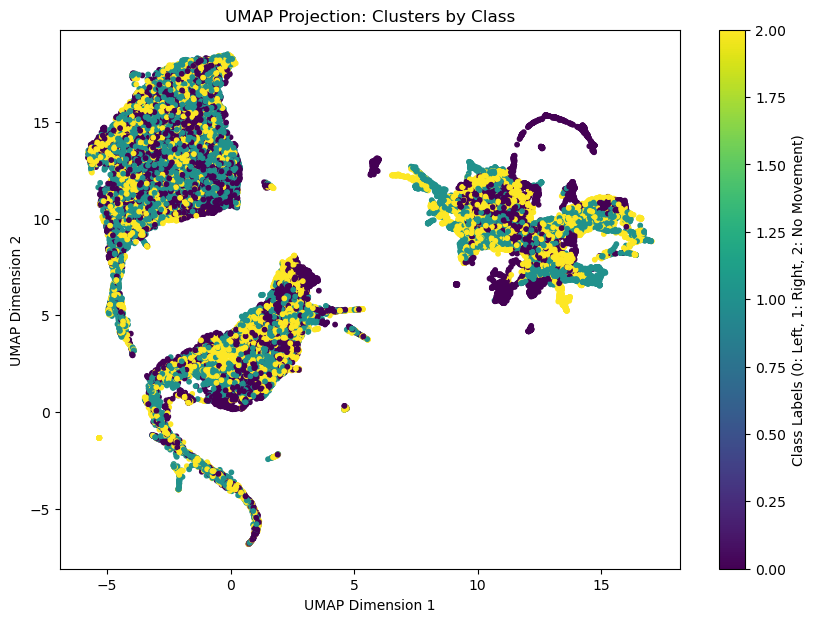

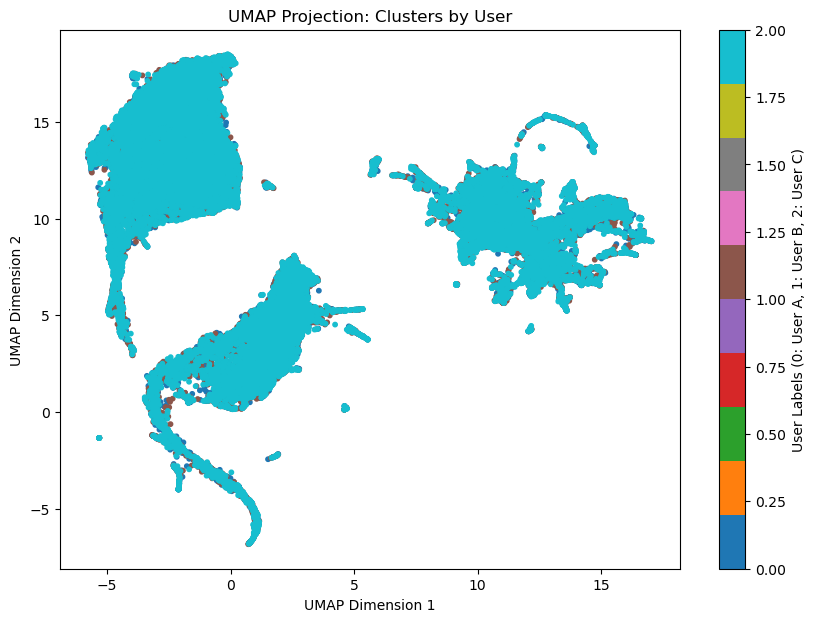

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Step 2: Load the combined training data (already shuffled and prepared)
train_data = pd.read_csv("shuffled_train_data.csv")

# Step 3: Separate class labels and features
# Class labels: First column
# Features: All remaining columns
class_labels = train_data.iloc[:, 0]
features = train_data.iloc[:, 1:]

# Step 4: Perform UMAP dimensionality reduction to 2D
# Exploring: Can UMAP reduce the 25-dimensional data to 2D while retaining meaningful structure?
umap_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = umap_2d.fit_transform(features)

# Step 5: Visualize clusters by class
# Exploring: Are the three classes (0, 1, 2) well-separated in the reduced 2D space?
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=class_labels, cmap='viridis', s=10)
plt.colorbar(scatter, label='Class Labels (0: Left, 1: Right, 2: No Movement)')
plt.title('UMAP Projection: Clusters by Class')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Step 6: (Optional) Add a "user" column to the data for user-specific visualization
# Exploring: Do the users (a, b, c) have distinct patterns in the reduced space?
# Assume 'user' is a pre-existing column that denotes user origin; if not, you may need to add it
train_data['user'] = ['a'] * len(user_a) + ['b'] * len(user_b) + ['c'] * len(user_c)
user_labels = train_data['user']

# Step 7: Visualize clusters by user
# Exploring: Are there distinct clusters corresponding to each user's data?
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=user_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='tab10', s=10)
plt.colorbar(scatter, label='User Labels (0: User A, 1: User B, 2: User C)')
plt.title('UMAP Projection: Clusters by User')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


In [8]:
# Check the number of rows for each user
print(train_data['user'].value_counts())


user
c    21427
a    15282
b    14946
Name: count, dtype: int64


/opt/anaconda3/envs/brain_bci_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


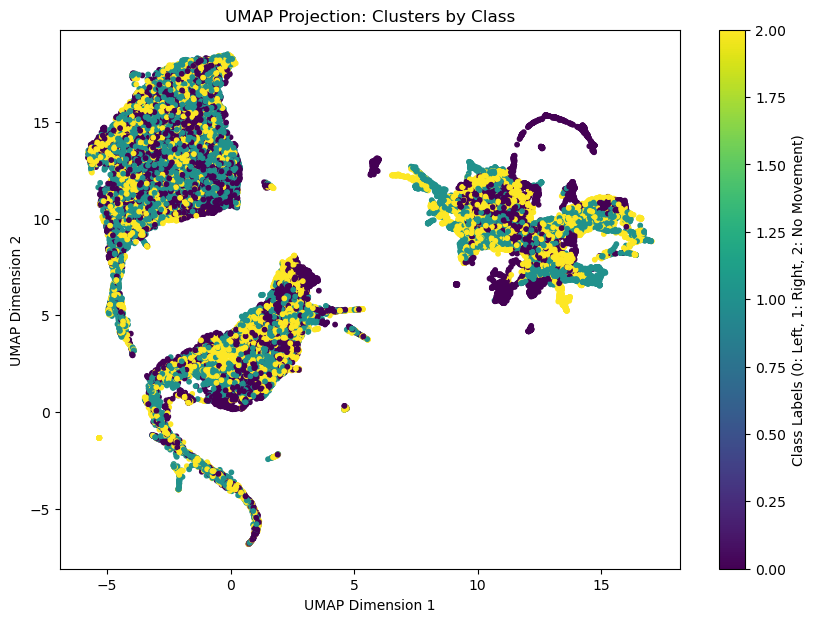

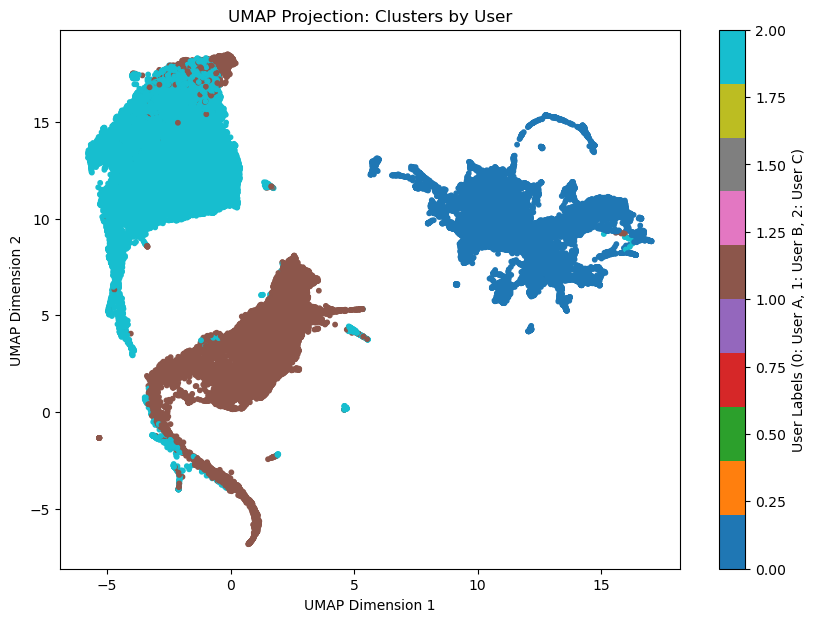

In [12]:
# Step 1: Import necessary libraries
import pandas as pd
import umap
import matplotlib.pyplot as plt


# Combine the data in a controlled manner, preserving the order of users
train_data = pd.concat([user_a, user_b, user_c], axis=0, ignore_index=True)

# Step 3: Add the correct "user" column based on the concatenation order
# This step ensures the rows align with the user labels.
train_data['user'] = ['a'] * len(user_a) + ['b'] * len(user_b) + ['c'] * len(user_c)

# Step 4: Shuffle the data for training purposes, but keep a copy of the user column
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Separate class labels and features
# Class labels: First column
# Features: All remaining columns
class_labels = train_data.iloc[:, 0]
features = train_data.iloc[:, 1:-1]  # Exclude the last 'user' column from features

# Step 6: Perform UMAP dimensionality reduction to 2D
umap_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = umap_2d.fit_transform(features)

# Step 7: Visualize clusters by class
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=class_labels, cmap='viridis', s=10)
plt.colorbar(scatter, label='Class Labels (0: Left, 1: Right, 2: No Movement)')
plt.title('UMAP Projection: Clusters by Class')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Step 8: Visualize clusters by user
user_labels = train_data['user'].map({'a': 0, 'b': 1, 'c': 2})  # Map user labels to numbers for coloring
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=user_labels, cmap='tab10', s=10)
plt.colorbar(scatter, label='User Labels (0: User A, 1: User B, 2: User C)')
plt.title('UMAP Projection: Clusters by User')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


/opt/anaconda3/envs/brain_bci_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


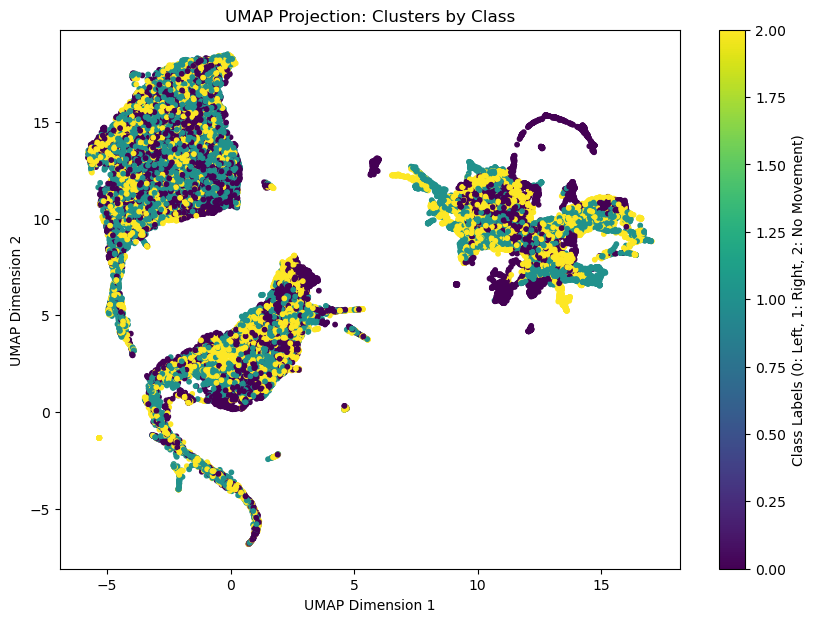

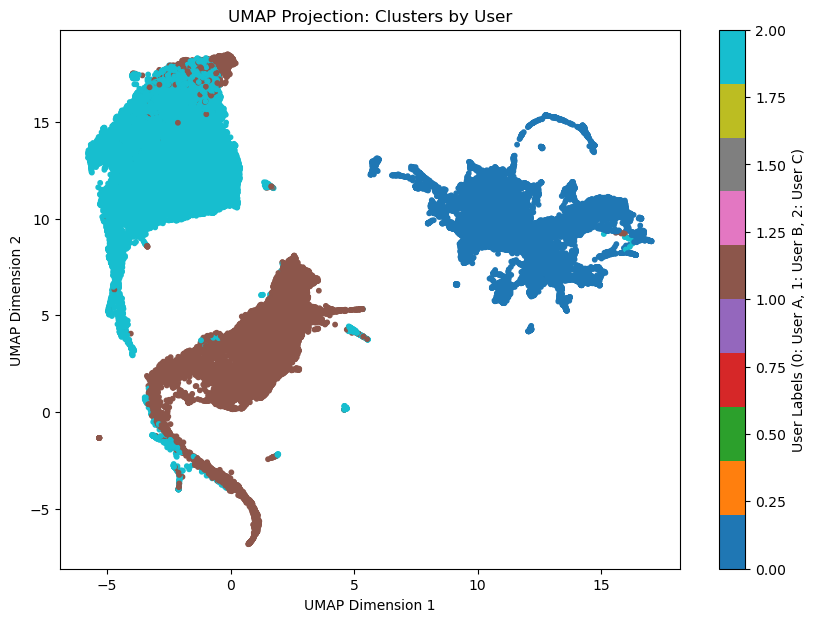

In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Step 2: Load individual user CSV files
# Loading the original datasets for each user to preserve the correct row order
user_data_a = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv')
user_data_b = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_b.csv')
user_data_c = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_c.csv')

# Step 3: Combine the data while keeping the order intact
# Stacking the data in the order: User A, User B, User C
combined_data = pd.concat([user_data_a, user_data_b, user_data_c], axis=0, ignore_index=True)

# Step 4: Add a "user_label" column to indicate the source user for each row
# Assigning user labels based on the length of each user's data
combined_data['user_label'] = ['A'] * len(user_data_a) + ['B'] * len(user_data_b) + ['C'] * len(user_data_c)

# Step 5: Shuffle the combined dataset for randomness
shuffled_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 6: Separate class labels and features
# Class labels: Assume they are in the first column
# Features: All remaining columns, excluding the 'user_label' column
class_targets = shuffled_data.iloc[:, 0]
feature_data = shuffled_data.iloc[:, 1:-1]  # Exclude the 'user_label' column

# Step 7: Perform UMAP dimensionality reduction to 2D
# Reducing 25-dimensional features to 2D for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(feature_data)

# Step 8: Visualize clusters by class
# Color the data points based on their class labels
plt.figure(figsize=(10, 7))
scatter_plot = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=class_targets, cmap='viridis', s=10)
plt.colorbar(scatter_plot, label='Class Labels (0: Left, 1: Right, 2: No Movement)')
plt.title('UMAP Projection: Clusters by Class')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Step 9: Visualize clusters by user
# Map user labels to numeric values for color encoding
user_numeric_labels = shuffled_data['user_label'].map({'A': 0, 'B': 1, 'C': 2})

plt.figure(figsize=(10, 7))
scatter_plot_user = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=user_numeric_labels, cmap='tab10', s=10)
plt.colorbar(scatter_plot_user, label='User Labels (0: User A, 1: User B, 2: User C)')
plt.title('UMAP Projection: Clusters by User')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


In [17]:
# Load the data for each user
user_data_a = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv')
user_data_b = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_b.csv')
user_data_c = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_c.csv')
user_data_d = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_d.csv')
user_data_e = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_e.csv')

# Combine data for Users A, B, and C
combined_data_abc = pd.concat([user_data_a, user_data_b, user_data_c], axis=0, ignore_index=True)

# Combine data for Users D and E (testing data)
combined_data_de = pd.concat([user_data_d, user_data_e], axis=0, ignore_index=True)


In [18]:
# Separate features and labels for Users A, B, C
features_abc = combined_data_abc.iloc[:, 1:]  # All columns except the first (class labels)
labels_abc = combined_data_abc.iloc[:, 0]     # The first column is the class label

# Separate features and labels for Users D, E
features_de = combined_data_de.iloc[:, 1:]
labels_de = combined_data_de.iloc[:, 0]


In [19]:
from sklearn.model_selection import train_test_split

# Split data for training and testing
X_train_abc, X_test_abc, y_train_abc, y_test_abc = train_test_split(features_abc, labels_abc, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_abc, y_train_abc)


LogisticRegression(max_iter=1000, random_state=42)

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test data (A, B, C)
y_pred_abc = logistic_model.predict(X_test_abc)

# Evaluate performance on Users A, B, C
accuracy_abc = accuracy_score(y_test_abc, y_pred_abc)
print(f"Accuracy on Users A, B, C (Test Split): {accuracy_abc:.2f}")
print("Classification Report for Users A, B, C:")
print(classification_report(y_test_abc, y_pred_abc))


Accuracy on Users A, B, C (Test Split): 0.40
Classification Report for Users A, B, C:
              precision    recall  f1-score   support

         0.0       0.42      0.32      0.36      3443
         1.0       0.39      0.71      0.50      3710
         2.0       0.46      0.14      0.22      3178

    accuracy                           0.40     10331
   macro avg       0.42      0.39      0.36     10331
weighted avg       0.42      0.40      0.37     10331



In [22]:
# Make predictions on the data for Users D and E
y_pred_de = logistic_model.predict(features_de)

# Evaluate performance on Users D and E
accuracy_de = accuracy_score(labels_de, y_pred_de)
print(f"Accuracy on Users D and E: {accuracy_de:.2f}")
print("Classification Report for Users D and E:")
print(classification_report(labels_de, y_pred_de))


Accuracy on Users D and E: 0.35
Classification Report for Users D and E:
              precision    recall  f1-score   support

         0.0       0.35      0.12      0.18     11990
         1.0       0.35      0.88      0.50     11869
         2.0       0.20      0.00      0.00      9971

    accuracy                           0.35     33830
   macro avg       0.30      0.33      0.23     33830
weighted avg       0.31      0.35      0.24     33830



In [23]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.4 MB/s eta 0:00:00


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 2: Train the model on Users A, B, C
xgb_model.fit(X_train_abc, y_train_abc)

# Step 3: Test the model on Users D and E
y_pred_xgb = xgb_model.predict(features_de)

# Step 4: Evaluate performance
accuracy_xgb = accuracy_score(labels_de, y_pred_xgb)
print(f"XGBoost Accuracy on Users D and E: {accuracy_xgb:.2f}")
print("XGBoost Classification Report for Users D and E:")
print(classification_report(labels_de, y_pred_xgb))


/opt/anaconda3/envs/brain_bci_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on Users D and E: 0.37
XGBoost Classification Report for Users D and E:
              precision    recall  f1-score   support

         0.0       0.37      0.27      0.31     11990
         1.0       0.36      0.59      0.45     11869
         2.0       0.41      0.22      0.29      9971

    accuracy                           0.37     33830
   macro avg       0.38      0.36      0.35     33830
weighted avg       0.38      0.37      0.35     33830



In [25]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model on Users A, B, C
rf_model.fit(X_train_abc, y_train_abc)

# Step 3: Test the model on Users D and E
y_pred_rf = rf_model.predict(features_de)

# Step 4: Evaluate performance
accuracy_rf = accuracy_score(labels_de, y_pred_rf)
print(f"Random Forest Accuracy on Users D and E: {accuracy_rf:.2f}")
print("Random Forest Classification Report for Users D and E:")
print(classification_report(labels_de, y_pred_rf))


Random Forest Accuracy on Users D and E: 0.36
Random Forest Classification Report for Users D and E:
              precision    recall  f1-score   support

         0.0       0.37      0.14      0.20     11990
         1.0       0.36      0.70      0.47     11869
         2.0       0.37      0.22      0.28      9971

    accuracy                           0.36     33830
   macro avg       0.37      0.35      0.32     33830
weighted avg       0.36      0.36      0.32     33830



In [26]:
from sklearn.neural_network import MLPClassifier

# Step 1: Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Step 2: Train the model on Users A, B, C
nn_model.fit(X_train_abc, y_train_abc)

# Step 3: Test the model on Users D and E
y_pred_nn = nn_model.predict(features_de)

# Step 4: Evaluate performance
accuracy_nn = accuracy_score(labels_de, y_pred_nn)
print(f"Neural Network Accuracy on Users D and E: {accuracy_nn:.2f}")
print("Neural Network Classification Report for Users D and E:")
print(classification_report(labels_de, y_pred_nn))


Neural Network Accuracy on Users D and E: 0.35
Neural Network Classification Report for Users D and E:
              precision    recall  f1-score   support

         0.0       0.37      0.36      0.37     11990
         1.0       0.35      0.44      0.39     11869
         2.0       0.33      0.23      0.27      9971

    accuracy                           0.35     33830
   macro avg       0.35      0.34      0.34     33830
weighted avg       0.35      0.35      0.35     33830



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score


In [29]:
user_data_a = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv')
user_data_b = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_b.csv')
user_data_c = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_c.csv')
user_data_d = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_d.csv')
user_data_e = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_e.csv')

# Combine Users A, B, C into one dataset
train_data = pd.concat([user_data_a, user_data_b, user_data_c], axis=0, ignore_index=True)

# Combine Users D and E into one dataset
test_data = pd.concat([user_data_d, user_data_e], axis=0, ignore_index=True)

# Separate features and labels for A, B, C
X_train_full = train_data.iloc[:, 1:].values  # Features (columns 1 to end)
y_train_full = train_data.iloc[:, 0].values  # Labels (column 0)

# Separate features and labels for D, E
X_test_full = test_data.iloc[:, 1:].values
y_test_full = test_data.iloc[:, 0].values

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Reshape features for RNN input (RNNs expect 3D input: [samples, time_steps, features])
X_train_full = X_train_full.reshape(X_train_full.shape[0], 1, X_train_full.shape[1])  # 1 time step
X_test_full = X_test_full.reshape(X_test_full.shape[0], 1, X_test_full.shape[1])


X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Convert labels to categorical for multi-class classification
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test_full, num_classes=3)


In [30]:
# Build the RNN model
model = Sequential()

# Input Layer
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Fully Connected Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(3, activation='softmax'))  # 3 classes: Left, Right, No Movement

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/envs/brain_bci_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Experiment with this number
    batch_size=32,  # Batch size for training
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ],
    verbose=1
)


Epoch 1/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4061 - loss: 1.0610 - val_accuracy: 0.4522 - val_loss: 1.0021
Epoch 2/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4474 - loss: 1.0020 - val_accuracy: 0.4755 - val_loss: 0.9723
Epoch 3/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4603 - loss: 0.9809 - val_accuracy: 0.4917 - val_loss: 0.9517
Epoch 4/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4703 - loss: 0.9624 - val_accuracy: 0.5018 - val_loss: 0.9347
Epoch 5/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4813 - loss: 0.9481 - val_accuracy: 0.5082 - val_loss: 0.9206
Epoch 6/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4857 - loss: 0.9417 - val_accuracy: 0.5025 - val_loss: 0.9105
Epoch 7/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4934 - loss: 0.9287 - val_accuracy: 0.5154 - val_loss: 0.9007
Epoch 8/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4980 - loss: 0.9220 - 

In [32]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy on Users A, B, C: {val_accuracy:.2f}")

# Classification report for validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
print("Classification Report for Users A, B, C:")
print(classification_report(y_val_true_classes, y_val_pred_classes))


Validation Accuracy on Users A, B, C: 0.58
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
Classification Report for Users A, B, C:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      3443
           1       0.49      0.71      0.58      3710
           2       0.72      0.42      0.53      3178

    accuracy                           0.58     10331
   macro avg       0.62      0.57      0.57     10331
weighted avg       0.61      0.58      0.57     10331



In [33]:
# Evaluate on D and E data
test_loss, test_accuracy = model.evaluate(X_test_full, y_test, verbose=0)
print(f"Test Accuracy on Users D and E: {test_accuracy:.2f}")

# Classification report for test set
y_test_pred = model.predict(X_test_full)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print("Classification Report for Users D and E:")
print(classification_report(y_test_true_classes, y_test_pred_classes))


Test Accuracy on Users D and E: 0.35
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step
Classification Report for Users D and E:
              precision    recall  f1-score   support

           0       0.36      0.45      0.40     11990
           1       0.35      0.52      0.42     11869
           2       0.23      0.03      0.05      9971

    accuracy                           0.35     33830
   macro avg       0.31      0.33      0.29     33830
weighted avg       0.32      0.35      0.30     33830



In [35]:
user_data_a = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_a.csv')
user_data_b = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_b.csv')
user_data_c = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_c.csv')
user_data_d = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_d.csv')
user_data_e = pd.read_csv('/Users/arjunasudani/Desktop/brain_bci_dsu_project/extracted_data/eeg/user_e.csv')

# Combine Users A, B, C into one dataset
train_data = pd.concat([user_data_a, user_data_b, user_data_c], axis=0, ignore_index=True)

# Combine Users D and E into one dataset
test_data = pd.concat([user_data_d, user_data_e], axis=0, ignore_index=True)

# Separate features and labels for training data (Users A, B, C)
X_train = train_data.iloc[:, 1:].values  # Features (columns 1 to end)
y_train = train_data.iloc[:, 0].values  # Labels (column 0)

# Separate features and labels for testing data (Users D, E)
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape features for RNN input (RNNs expect 3D input: [samples, time_steps, features])
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # Single time step
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert labels to categorical for multi-class classification
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt



def build_model_rnn(input_shape):
    inputs = Input(shape=input_shape)
    lstm_1 = LSTM(32, return_sequences=True)(inputs)
    drop_1 = Dropout(0.4)(lstm_1)
    lstm_2 = LSTM(16, return_sequences=False)(drop_1)
    drop_2 = Dropout(0.4)(lstm_2)
    outputs = Dense(3, activation='softmax')(drop_2)  # 3 classes

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model with input shape [1, num_features]
input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = build_model_rnn(input_shape)


In [38]:
# Train the model on Users A, B, C
history = rnn_model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data for validation
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)


Epoch 1/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3739 - loss: 1.0768 - val_accuracy: 0.4472 - val_loss: 1.0948
Epoch 2/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4198 - loss: 1.0236 - val_accuracy: 0.4670 - val_loss: 1.0957
Epoch 3/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4339 - loss: 0.9966 - val_accuracy: 0.4449 - val_loss: 1.0941
Epoch 4/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.4473 - loss: 0.9807 - val_accuracy: 0.4463 - val_loss: 1.0907
Epoch 5/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.4584 - loss: 0.9660 - val_accuracy: 0.4458 - val_loss: 1.0942
Epoch 6/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.4635 - loss: 0.9599 - val_accuracy: 0.4456 - val_loss: 1.0947
Epoch 7/30
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.4622 - loss: 0.9549 - val_accuracy: 0.4653 - val_loss: 1.0917


In [39]:
# Evaluate performance on validation data
val_loss, val_accuracy = rnn_model.evaluate(X_train, y_train, verbose=0)
print(f"Validation Accuracy (Users A, B, C): {val_accuracy:.2f}")


Validation Accuracy (Users A, B, C): 0.47


In [40]:
# Evaluate on Users D and E
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Users D and E): {test_accuracy:.2f}")

# Classification Report for Users D and E
y_test_pred = rnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
print("Classification Report for Users D and E:")
print(classification_report(y_test_true_classes, y_test_pred_classes))


Test Accuracy (Users D and E): 0.36
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step
Classification Report for Users D and E:
              precision    recall  f1-score   support

           0       0.38      0.26      0.31     11990
           1       0.36      0.76      0.49     11869
           2       0.22      0.00      0.00      9971

    accuracy                           0.36     33830
   macro avg       0.32      0.34      0.27     33830
weighted avg       0.32      0.36      0.28     33830



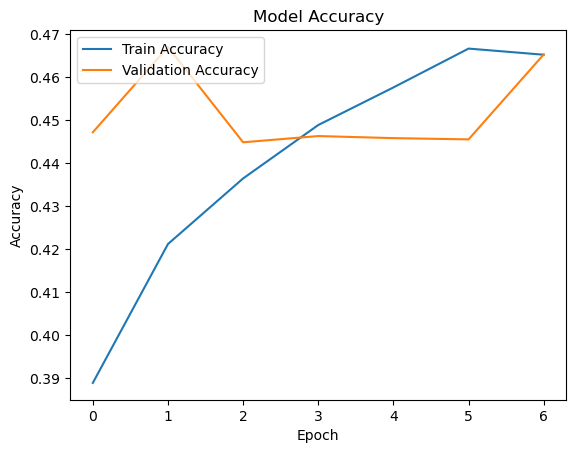

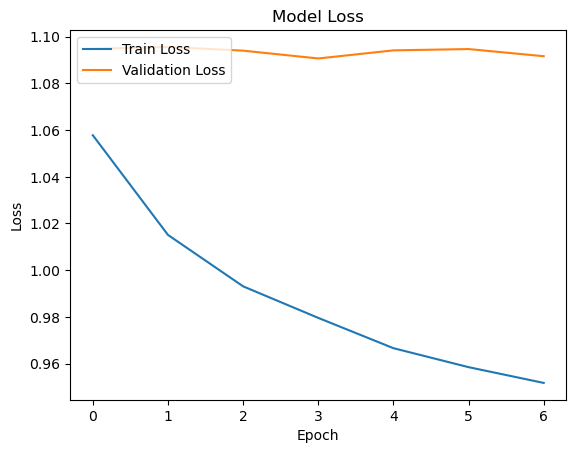

In [41]:
import matplotlib.pyplot as plt

# Plot training/validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()
